In [3]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

#import helper

import matplotlib.pyplot as plt

In [4]:

# The MNIST datasets are hosted on yann.lecun.com that has moved under CloudFlare protection
# Run this script to enable the datasets download
# Reference: https://github.com/pytorch/vision/issues/1938

from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [29]:
from torchvision import datasets, transforms   #torchvision has datasets related to CV
# define a transform to normalize/pre-process the data
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,)),])

# Download and divide data into batches
train_data = datasets.MNIST('~/.pytorch/MNIST_data/',download=True,train=True,transform=transform)
trainloader = torch.utils.data.DataLoader(train_data,batch_size=64,shuffle=True) #converts data into batches


In [7]:
#side note
# list of vowels
vowels = ['a', 'e', 'i', 'o', 'u']
vowels_iter = iter(vowels)

print(next(vowels_iter))    # 'a'
print(next(vowels_iter))    # 'e'
print(next(vowels_iter))    # 'i'
print(next(vowels_iter))    # 'o'
print(next(vowels_iter))    # 'u'

a
e
i
o
u


In [9]:
#accessing the training set batch by batch
data_iter = iter(trainloader)
images,labels = data_iter.next()
print(type(images),images.shape,labels.shape)

<class 'torch.Tensor'> torch.Size([64, 1, 28, 28]) torch.Size([64])


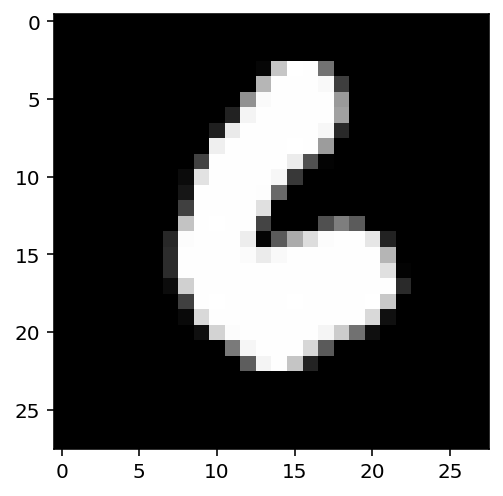

In [14]:
plt.imshow(images[45].numpy().squeeze(),cmap='Greys_r')
#plt.imshow(images[45].numpy().squeeze(),cmap='gray')

In [21]:
def nn(weights,features,bias):
    out= sigmoid_activation(torch.add(torch.mm(features,weights) , bias))
    return out
def sigmoid_activation(x):
    return 1/(1+torch.exp(-x))   # torch.exp is the tensor version of exp function which imput and output elements of tensor type 

Exercise: Flatten the batch of images images. Then build a multi-layer network with 784 input units, 256 hidden units, and 10 output units using random tensors for the weights and biases. For now, use a sigmoid activation for the hidden layer. Leave the output layer without an activation, we'll add one that gives us a probability distribution next.

In [32]:
data_iter = iter(trainloader)
for i in range(10):
    images,labels = data_iter.next()
    images= images.flatten(start_dim=1)
    #print(images.shape)

# defining the sizes of the layers in the network
    input_im= images.shape[0]
    features= images.shape[1]
    hidden_layer= 256
    out=10

#initializing the weight matrices
    Weights1 = torch.randn((features,hidden_layer))
    Weights2 = torch.randn((hidden_layer,out))

    Bias1= torch.randn((1,hidden_layer))
    Bias2= torch.randn((1,out))

# Applying inputs to nn
    h = sigmoid_activation(torch.add(torch.mm(images,Weights1) , Bias1))
    nn_out = torch.add(torch.mm(h,Weights2) , Bias2)
    print(nn_out.shape)

torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 10])
torch.Size([64, 10])


Exercise: Implement a function softmax that performs the softmax calculation and returns probability distributions for each example in the batch. Note that you'll need to pay attention to the shapes when doing this. If you have a tensor a with shape (64, 10) and a tensor b with shape (64,), doing a/b will give you an error because PyTorch will try to do the division across the columns (called broadcasting) but you'll get a size mismatch. The way to think about this is for each of the 64 examples, you only want to divide by one value, the sum in the denominator. So you need b to have a shape of (64, 1). This way PyTorch will divide the 10 values in each row of a by the one value in each row of b. Pay attention to how you take the sum as well. You'll need to define the dim keyword in torch.sum. Setting dim=0 takes the sum across the rows while dim=1 takes the sum across the columns.

In [39]:
#shorter implementation 
def softmax2(x):
    return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)

In [40]:
#implementing softmax
def softmax(x):
    ## TODO: Implement the softmax function here
    out=torch.zeros(x.shape)
    classes= x.shape[1]
    exp_x= torch.exp(x)
    for i in range(x.shape[0]):
        out[i]= exp_x[i]/torch.sum(exp_x[i])
    return out

# Here, out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax2(nn_out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [43]:
print(torch.sum(torch.exp(nn_out),dim=1).shape)
print(torch.sum(torch.exp(nn_out),dim=1).view(-1,1).shape)

torch.Size([64])
torch.Size([64, 1])


#Building neural network using torch.nn and torch.nn.functional module 


In [45]:
from torch import nn
import torch.nn.functional as F


In [46]:
#without using F
class Net(nn.Module):
    def __init__(self):
        super().__init__()   #initializing the parent class
        
        #Defining both layers and functions in terms of transformations
        self.hidden = nn.Linear(784,256)  #linear transformation is w*x +b
        self.out = nn.Linear(256,10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self,x):
        x= self.hidden(x)
        x= self.sigmoid(x)
        x= self.out(x)
        x= self.softmax(x)
        
        return(x)

Let's go through this bit by bit.

class Network(nn.Module):
Here we're inheriting from nn.Module. Combined with super().__init__() this creates a class that tracks the architecture and provides a lot of useful methods and attributes. It is mandatory to inherit from nn.Module when you're creating a class for your network. The name of the class itself can be anything.

self.hidden = nn.Linear(784, 256)
This line creates a module for a linear transformation, $x\mathbf{W} + b$, with 784 inputs and 256 outputs and assigns it to self.hidden. The module automatically creates the weight and bias tensors which we'll use in the forward method. You can access the weight and bias tensors once the network (net) is created with net.hidden.weight and net.hidden.bias.

self.output = nn.Linear(256, 10)
Similarly, this creates another linear transformation with 256 inputs and 10 outputs.

self.sigmoid = nn.Sigmoid()
self.softmax = nn.Softmax(dim=1)
Here I defined operations for the sigmoid activation and softmax output. Setting dim=1 in nn.Softmax(dim=1) calculates softmax across the columns.

def forward(self, x):
PyTorch networks created with nn.Module must have a forward method defined. It takes in a tensor x and passes it through the operations you defined in the __init__ method.

x = self.hidden(x)
x = self.sigmoid(x)
x = self.output(x)
x = self.softmax(x)
Here the input tensor x is passed through each operation and reassigned to x. We can see that the input tensor goes through the hidden layer, then a sigmoid function, then the output layer, and finally the softmax function. It doesn't matter what you name the variables here, as long as the inputs and outputs of the operations match the network architecture you want to build. The order in which you define things in the __init__ method doesn't matter, but you'll need to sequence the operations correctly in the forward method.

Now we can create a Network object.

In [47]:
model= Net()
model

Net(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [51]:
model.hidden.weight


Parameter containing:
tensor([[ 0.0301, -0.0175, -0.0161,  ..., -0.0031, -0.0111,  0.0088],
        [ 0.0027, -0.0098, -0.0140,  ..., -0.0071, -0.0210, -0.0013],
        [-0.0275,  0.0290,  0.0335,  ..., -0.0332, -0.0142, -0.0270],
        ...,
        [ 0.0257,  0.0353,  0.0119,  ...,  0.0268, -0.0035, -0.0194],
        [-0.0131,  0.0203, -0.0029,  ..., -0.0209, -0.0194,  0.0120],
        [-0.0227,  0.0206,  0.0190,  ...,  0.0026,  0.0163, -0.0202]],
       requires_grad=True)

In [50]:
model.hidden.bias

Parameter containing:
tensor([ 1.3197e-02, -3.4711e-02,  1.7848e-02,  1.0903e-02,  2.3454e-02,
        -5.7313e-03, -2.3671e-02,  2.3854e-02, -3.4391e-02,  3.5525e-03,
         1.5774e-02, -3.5548e-02, -5.7580e-03,  1.0564e-02,  1.2229e-02,
         8.9516e-03,  2.7333e-02, -1.1548e-03, -3.4564e-02, -2.5024e-03,
        -3.1393e-03,  1.1039e-02, -1.1059e-02,  2.1330e-02,  1.1883e-02,
        -6.6643e-04, -3.3877e-02,  2.1874e-03,  2.8244e-02,  1.0060e-02,
         9.7700e-03, -1.8463e-02,  1.8976e-02, -1.9900e-02,  3.3600e-02,
        -1.6147e-02, -3.3679e-02, -2.4196e-02,  2.9675e-02,  2.3251e-02,
         3.6994e-03, -1.5270e-02,  2.3761e-02,  9.9350e-04,  3.0044e-02,
         1.1778e-03,  2.0746e-02,  1.7126e-02, -3.4967e-02,  1.3074e-02,
        -2.5816e-06, -2.8678e-02,  1.3151e-02,  1.8260e-02,  1.0664e-02,
        -2.1808e-02, -1.0786e-02, -1.4538e-02,  1.2295e-02,  1.6038e-02,
         9.5513e-03,  2.2620e-02, -1.7838e-02, -1.4744e-03,  1.1633e-02,
        -1.4312e-03, -2.8173e

In [52]:
#Creating PyTorch using torch.nn.functional
#This is more common way as PyTorch don't initialize the weight for sigmoid and softmax and
#treat them purely as functions

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784,256)
        self.output = nn.Linear(256,10)
        
    def forward(self,x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x),dim=1)

In [53]:
model2 = Network()
model2

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

Exercise: Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the nn.ReLU module or F.relu function.

In [56]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128,64)
        self.out = nn.Linear(64,10)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.out(x),dim=1)
        return x

In [57]:
model3= NN()
model3

NN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)

## Custom Initialization of weights
For custom initialization, we want to modify these tensors in place. These are actually autograd Variables, so we need to get back the actual tensors with model.fc1.weight.data. Once we have the tensors, we can fill them with zeros (for biases) or random normal values.

In [60]:
model3.fc1.bias.data.fill_(0)
model3.fc2.weight.data.normal_(std=0.05)

tensor([[-0.0390,  0.0673,  0.0455,  ...,  0.0751, -0.0633,  0.0750],
        [ 0.0783, -0.0471, -0.0348,  ..., -0.0128,  0.0031, -0.0299],
        [-0.0286, -0.0676,  0.1302,  ...,  0.0457,  0.0010,  0.0417],
        ...,
        [ 0.0283, -0.0568, -0.0135,  ..., -0.0261,  0.0762, -0.0394],
        [-0.0753, -0.0250, -0.0175,  ..., -0.0487, -0.0141, -0.0362],
        [-0.0365, -0.0125,  0.0915,  ..., -0.0788, -0.0638,  0.0364]])

In [65]:
# forward pass 
train_data_iter = iter(trainloader)
images, labels = train_data_iter.next()
images.resize_(images.shape[0],784)
probabs = model3.forward(images)


## Using nn.Sequential

In [69]:
#An easy way of creating a model is using nn.Sequential

#Hyperparameters of our network 
input_size = 784
hidden_layer_sizes = [128,64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size,hidden_layer_sizes[0]),nn.ReLU(),
                     nn.Linear(hidden_layer_sizes[0],hidden_layer_sizes[1]), nn.ReLU(),
                     nn.Linear(hidden_layer_sizes[1],output_size),nn.Softmax(dim=1))

# forward pass 
train_data_iter = iter(trainloader)
images, labels = train_data_iter.next()
images.resize_(images.shape[0],784)
probabs = model.forward(images)

# To access individual layers
print(model[0].weight)

Parameter containing:
tensor([[-0.0291, -0.0259, -0.0233,  ..., -0.0304,  0.0287, -0.0176],
        [ 0.0076,  0.0232,  0.0179,  ..., -0.0068, -0.0193,  0.0060],
        [-0.0089,  0.0178,  0.0091,  ..., -0.0309, -0.0156, -0.0098],
        ...,
        [ 0.0061, -0.0020,  0.0070,  ...,  0.0005,  0.0276, -0.0083],
        [ 0.0284, -0.0119, -0.0218,  ..., -0.0025,  0.0131, -0.0071],
        [ 0.0085,  0.0211, -0.0091,  ..., -0.0170, -0.0164,  0.0303]],
       requires_grad=True)


In [70]:
# We can also assign names to the layers using ordered Dictionary. It will be useful in accessing the layers
from collections import OrderedDict

model = nn.Sequential(OrderedDict([('fc1',nn.Linear(input_size,hidden_layer_sizes[0])),
                                   ('relu1',nn.ReLU()),
                     ('fc2',nn.Linear(hidden_layer_sizes[0],hidden_layer_sizes[1])),
                                  ('relu2',nn.ReLU()),
                     ('out',nn.Linear(hidden_layer_sizes[1],output_size)),
                                   ('softmax',nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (out): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [72]:
print(model.fc1.weight)

Parameter containing:
tensor([[-0.0180,  0.0155, -0.0327,  ..., -0.0235, -0.0303, -0.0310],
        [-0.0267, -0.0340, -0.0197,  ..., -0.0183,  0.0288,  0.0246],
        [-0.0147, -0.0307, -0.0093,  ...,  0.0257, -0.0137,  0.0327],
        ...,
        [-0.0098,  0.0282,  0.0273,  ..., -0.0160, -0.0021,  0.0312],
        [-0.0275,  0.0264,  0.0164,  ...,  0.0231, -0.0138,  0.0252],
        [ 0.0015,  0.0219,  0.0064,  ..., -0.0139, -0.0016,  0.0328]],
       requires_grad=True)
